In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm

In [3]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [4]:
CLN_DATA_PATH='../data/codon_usage.csv'

try:
    codon_df = pd.read_csv(CLN_DATA_PATH)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("ERROR: The data file does not exist.")

Data loaded successfully.


C:\Users\pier3\AppData\Local\Temp\ipykernel_7416\1407947329.py:4: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  codon_df = pd.read_csv(CLN_DATA_PATH)


In [5]:
print(f"The shape of my dataset is: {codon_df.shape}")


The shape of my dataset is: (13028, 69)


In [6]:
codon_df.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [7]:
codon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

UUU and UUC have strings inside even though it also has floats values that we saw before

In [8]:
codon_df.iloc[485:487, :]


,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
485,vrl,0,12433,3105,Garlic virus A,0.01643,0.02222,0.0132,0.00741,0.01932,...,0.00258,0.01288,0.00805,0.02093,0.04444,0.02544,0.02061,0.00129,0.00000,0.00129
486,vrl,0,12440,1238,Non-A,non-B hepatitis virus,0.04362,0.0210,0.01292,0.01292,...,0.00081,0.00323,0.00242,0.00162,0.04443,0.01696,0.02423,0.02262,0.00162,0.00000


In [9]:
codon_df.iloc[5062:5065, :]

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
5062,bct,0,352164,1374,Sphingomonas sp. NM05,0.00946,0.03202,0.00073,0.00946,0.01528,...,0.01601,0.00073,0.00291,0.02183,0.04148,0.03130,0.03493,0.00218,0.00000,0.00146
5063,bct,0,353569,1698,Salmonella enterica subsp. enterica serovar 4,12;I,-,0.02120,0.02356,0.01178,...,0.03062,0.00118,0.00707,0.00118,0.00000,0.02945,0.02356,0.04476,0.02473,0.00118
5064,bct,0,354,25616,Azotobacter vinelandii,0.00453,0.03264,0.00090,0.00921,0.00488,...,0.01300,0.00168,0.00273,0.01925,0.04591,0.02416,0.03560,0.00031,0.00043,0.00230


Only one value was a string as "non-B hepatitis virus" for column UUU and "12;I" for the columun UUC

In [10]:
codon_df = codon_df.drop([486])


Decided to drop this because is only one row from 13028 rows

In [11]:
codon_df.iloc[485:487, :]

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
485,vrl,0,12433,3105,Garlic virus A,0.01643,0.02222,0.0132,0.00741,0.01932,...,0.00258,0.01288,0.00805,0.02093,0.04444,0.02544,0.02061,0.00129,0.0,0.00129
487,vrl,0,12441,4147,Kilham rat virus,0.02556,0.0135,0.0000,0.01567,0.01326,...,0.00145,0.03111,0.00241,0.01688,0.04292,0.02098,0.02628,0.00169,0.0,0.00000


Sanity check

In [12]:
codon_df = codon_df.drop([5063])

In [13]:
codon_df.iloc[5062:5065, :]

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
5064,bct,0,354,25616,Azotobacter vinelandii,0.00453,0.03264,0.00090,0.00921,0.00488,...,0.01300,0.00168,0.00273,0.01925,0.04591,0.02416,0.03560,0.00031,0.00043,0.00230
5065,bct,0,354242,638965,Campylobacter jejuni subsp. jejuni 81-176,0.05498,0.00458,0.04962,0.01512,0.03013,...,0.00021,0.01669,0.00275,0.04860,0.00449,0.05741,0.01287,0.00217,0.00035,0.00078
5066,bct,0,354581,1577,Nitrosospira sp. 9SS1,0.01522,0.02536,0.00254,0.01839,0.01015,...,0.00824,0.00317,0.00127,0.02917,0.02854,0.05263,0.01585,0.00063,0.00127,0.00063


Same approach applied to this row

Now we have to change this columns as float like the others codon columns

In [14]:
codon_df['UUU'] = codon_df['UUU'].astype(float)
codon_df['UUC'] = codon_df['UUC'].astype(float)

In [15]:
codon_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13026 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13026 non-null  object 
 1   DNAtype      13026 non-null  int64  
 2   SpeciesID    13026 non-null  int64  
 3   Ncodons      13026 non-null  int64  
 4   SpeciesName  13026 non-null  object 
 5   UUU          13026 non-null  float64
 6   UUC          13026 non-null  float64
 7   UUA          13026 non-null  float64
 8   UUG          13026 non-null  float64
 9   CUU          13026 non-null  float64
 10  CUC          13026 non-null  float64
 11  CUA          13026 non-null  float64
 12  CUG          13026 non-null  float64
 13  AUU          13026 non-null  float64
 14  AUC          13026 non-null  float64
 15  AUA          13026 non-null  float64
 16  AUG          13026 non-null  float64
 17  GUU          13026 non-null  float64
 18  GUC          13026 non-null  float64
 19  GUA      

All the columns have the datatype options that correspond

In [16]:
codon_df.describe().T

,count,mean,std,min,25%,50%,75%,max
DNAtype,13026.0,0.367265,0.688764,0.0,0.00000,0.000000,1.000000,1.200000e+01
SpeciesID,13026.0,130443.036926,124777.067741,7.0,28851.25000,81971.500000,222890.500000,4.653640e+05
Ncodons,13026.0,79617.758483,719755.572570,1000.0,1602.00000,2929.000000,9120.000000,4.066258e+07
UUU,13026.0,0.024818,0.017628,0.0,0.01391,0.021750,0.031308,2.173000e-01
UUC,13026.0,0.023440,0.011598,0.0,0.01538,0.021905,0.029210,9.169000e-02
...,...,...,...,...,...,...,...,...
GAA,13026.0,0.028291,0.014343,0.0,0.01736,0.026085,0.036800,1.448900e-01
GAG,13026.0,0.021683,0.015019,0.0,0.00971,0.020540,0.031128,1.585500e-01
UAA,13026.0,0.001640,0.001785,0.0,0.00056,0.001380,0.002370,4.520000e-02
UAG,13026.0,0.000590,0.000882,0.0,0.00000,0.000420,0.000830,2.561000e-02


In [17]:
#categorical variables
codon_df_cat = codon_df.select_dtypes(include='object').copy()
#numerical variables
codon_df_num = codon_df.select_dtypes(include=['int','float']).copy()

In [18]:
codon_df_cat.apply(lambda x: x.nunique(), axis=0)

Kingdom           11
SpeciesName    13014
dtype: int64

In [19]:
codon_df_num.apply(lambda x: x.nunique(), axis=0)

DNAtype         11
SpeciesID    12366
Ncodons       7103
UUU           4789
UUC           4119
             ...  
GAA           4827
GAG           4686
UAA            701
UAG            421
UGA           1786
Length: 67, dtype: int64

In [20]:
print(f"this are the total unique {codon_df['Kingdom'].value_counts()}" )
codon_df['Kingdom'].value_counts(normalize=True)*100

this are the total unique Kingdom
bct    2919
vrl    2831
pln    2523
vrt    2077
inv    1345
mam     572
phg     220
rod     215
pri     180
arc     126
plm      18
Name: count, dtype: int64


Kingdom
bct    22.409028
vrl    21.733456
pln    19.368954
vrt    15.945033
inv    10.325503
mam     4.391218
phg     1.688930
rod     1.650545
pri     1.381852
arc     0.967296
plm     0.138185
Name: proportion, dtype: float64

In [21]:
print(f"This are the total unique {codon_df['SpeciesName'].value_counts()}" )

This are the total unique SpeciesName
Escherichia coli O157                         4
Ageratum yellow vein Hualian virus-[Taiwan    3
Cotton leaf curl Rajasthan virus - [India     3
Escherichia coli O111                         3
Tomato leaf curl Bangalore virus - [India     2
                                             ..
Gordonia sp. TY-5                             1
Pseudomonas sp. PCL1171                       1
Geobacillus kaustophilus HTA426               1
Brucella ovis                                 1
mitochondrion Homo sapiens                    1
Name: count, Length: 13014, dtype: int64


Now lets check duplicates

In [22]:
codon_df.duplicated().sum()

0

In [23]:
codon_df[codon_df.duplicated(keep=False)]

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA


In [24]:
codon_df.isna().mean()*100

Kingdom        0.0
DNAtype        0.0
SpeciesID      0.0
Ncodons        0.0
SpeciesName    0.0
              ... 
GAA            0.0
GAG            0.0
UAA            0.0
UAG            0.0
UGA            0.0
Length: 69, dtype: float64

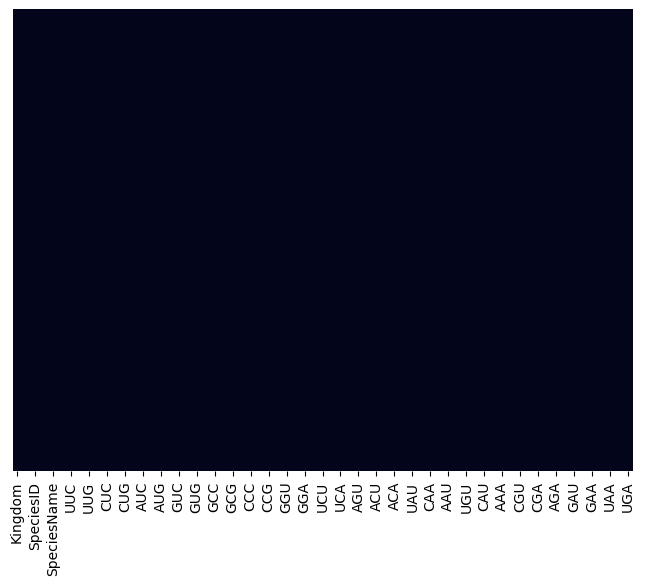

In [27]:
plt.figure()
sns.heatmap(codon_df.isnull(), yticklabels=False,cbar=False)
plt.show()

After the whole exploration, no missing values found in the set. 


In [26]:
codon_df_clean = codon_df.copy()
codon_df_clean.to_csv('../data/codon_df_clean.csv')

Proceed to save the clean dataset